<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_02_CLASS_13_ajuste_Antoine_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving multiple nonlinear algebraic equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def FUNCTION(x):
  A = x[0]
  B = x[1]
  C = x[2]
  P = [1,5,10,20,40,60,100,200,400,760]
  T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
  Num =10 # Num = len(P)
  Soma = 0

  for i in range(Num):
    TC = T[i]
    Pcal = np.exp((A - B/ (TC+C)))
    Ptrue = P[i]
    Soma = Soma + (Ptrue-Pcal)**2

  return Soma

In [3]:
import numpy as np


def Enxame(PAR,NPAR,MAX,MIN):
    x=np.zeros((NPAR, len(MAX)))
    for j in range(len(MAX)):
        for i in range(NPAR):
            x[i,j]=MIN[j]+(MAX[j]-MIN[j])*np.random.random()
    return x

def OBJ(x):
    rows = len(x)
    cols = len(x[0])
    fobj=np.zeros(rows)
    for i in range(rows):
        for j in range(cols):
            fobj[i]=FUNCTION(x[i,])
    return fobj
    # return fobj.min()

def VALOR(x):
    fob=FUNCTION(x)
    return fob

def BEST(X,RBEST):
    rows = len(X)
    cols = len(X[0])
    YCAL=OBJ(X)
    NEW=VALOR(RBEST)
    for i in range(rows):
        for j in range(cols):
            if(YCAL[i]<NEW):
                RBEST[j]=X[i,j]
    return RBEST

def PART(X,PBEST):
    rows = len(X)
    cols = len(X[0])
    YCAL=OBJ(PBEST)
    NEW=OBJ(X).min()
    for i in range(rows):
        for j in range(cols):
            if(YCAL[i]>NEW):
                PBEST[i,j]=X[i,j]
    return PBEST

def VE(X,VEL,BEST,PBEST,W,C1,C2):
    rows = len(X)
    cols = len(X[0])
    for i in range(rows):
        for j in range(cols):
            R1=np.random.random()
            R2=np.random.random()
            VEL[i,j]=W*VEL[i,j]+C1*R1*(PBEST[i,j]-X[i,j])+C2*R2*(BEST[j]-X[i,j])
            X[i,j]=X[i,j]+VEL[i,j]
    return VEL,X


def PSO(W,C1,C2,NPAR,ITE,PAR,MAX,MIN):
    X=Enxame(PAR,NPAR,MAX,MIN) # CRIA A POPULACAO
    ycal=OBJ(X) # CALCULA A FUNCAO OBJETIVO PARA TODAS PARTICULAS
    PBEST=PART(X,X) # O MELHOR LOCAL DE CADA PARTICULA INICIALMENTE ALEATORIA
    VBEST=[]
    for i in range(PAR):
        VBEST.append(1e10)
    VBEST=BEST(X,VBEST)
    VELOC=Enxame(PAR,NPAR,MAX,MIN)# VELOCIDADES INICIALMENTE ALEATORIAS
    RESP=[]
    for k in range(ITE):
        yteste=VALOR(VBEST)
        VELOC, X=VE(X,VELOC,VBEST,PBEST,W,C1,C2)
        VBEST=BEST(X,VBEST)
        PBEST=PART(X,PBEST)
        yteste=VALOR(VBEST)
        RESP.append(yteste)
    return RESP,VBEST

In [4]:
W=0.75
C1=2
C2=2
NPAR=100 #PARTICULAS
ITE=2000 #ITERACOES
PAR=3 #NUM DE PARAMETROS A SER OTIMIZADOS
MAX=[1000,1000,1000] # MAXIMO DE CADA PARAMETRO
MIN=[-1000,-1000,-1000] # MINIMO DE CADA PARAMETRO

#resp=PSOnew.PSO(W,C1,C2,NPAR,ITE,PAR,MAX,MIN)
resp,best= PSO(W,C1,C2,NPAR,ITE,PAR,MAX,MIN)

for i in range(ITE):
    if((i+1)%10==0):
        print("iteracao=",i+1,"f obj=",resp[i])
print(best)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  


iteracao= 10 f obj= 533780.4105829502
iteracao= 20 f obj= 530457.43703582
iteracao= 30 f obj= 283256.0648982581
iteracao= 40 f obj= 84342.02337937901
iteracao= 50 f obj= 69860.43984676462
iteracao= 60 f obj= 46802.14018562102
iteracao= 70 f obj= 4862.416546055273
iteracao= 80 f obj= 4410.748135056627
iteracao= 90 f obj= 4410.748135056627
iteracao= 100 f obj= 4333.487540798727
iteracao= 110 f obj= 4302.923160395476
iteracao= 120 f obj= 4264.754195411512
iteracao= 130 f obj= 4264.754195411512
iteracao= 140 f obj= 4248.098014901392
iteracao= 150 f obj= 4238.787742688599
iteracao= 160 f obj= 4235.144019557622
iteracao= 170 f obj= 4233.179389843384
iteracao= 180 f obj= 4231.34838809372
iteracao= 190 f obj= 4226.778440857636
iteracao= 200 f obj= 4213.60062083573
iteracao= 210 f obj= 4207.103953257218
iteracao= 220 f obj= 4200.554102295464
iteracao= 230 f obj= 4195.226288214635
iteracao= 240 f obj= 4192.430029792231
iteracao= 250 f obj= 4188.113957463554
iteracao= 260 f obj= 4175.321529029967

In [5]:
w = resp
A = w[0]
B = w[1]
C = w[2]
Pcalc = []

# A, B, C = Resultado.x
P = [1,5,10,20,40,60,100,200,400,760]
T = [-36.7,-19.6,-11.5,-2.6,7.6,15.4,26.1,42.2,60.6,80.1]
Num =10

for i in range(Num):
  TC =T[i]
  Pi = np.exp((A - B/ (TC+C)))
  Pcalc.append(Pi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


(0.0, 800.0)

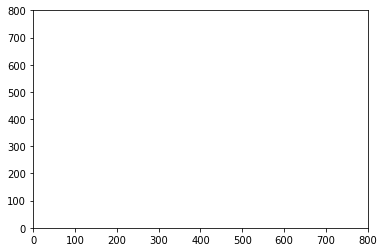

In [6]:
plt.scatter(P,Pcalc)
plt.xlim([0,800])
plt.ylim([0,800])

In [7]:
pd.DataFrame({'Ptrue':P,'Pcalc':Pcalc})

,Ptrue,Pcalc
0,1,inf
1,5,inf
2,10,inf
3,20,inf
4,40,inf
5,60,inf
6,100,inf
7,200,inf
8,400,inf
9,760,inf
